# 1 環境とエージェント

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

In [2]:
class Environment:
    
    def __init__(self, size=3, lucky=[]):
        
        self.size = size
        self.lucky = lucky
        self.goal = (size-1, size-1)
        self.states = [(x, y) for x in range(size) for y in range(size)]
        
        self.value = {}
        for s in self.states:
            self.value[s] = 0
        
    def next_state(self, s, a):
        
        s_next = (s[0] + a[0], s[1] + a[1])
        
        if s == self.goal:
            return [(1, s)]
        
        if s_next not in self.states:
            return [(1, s)]
        
        if s_next in self.lucky:
            return [(0.8, self.goal), (0.2, s_next)]
        
        return [(1, s_next)]
    
    def reward(self, s, s_next):
        
        if s == self.goal:
            return 0
        
        if s_next == self.goal:
            return 1
        
        return 0            

In [3]:
class Agent():
    
    def __init__(self, environment, policy=[0, 0, 1/2, 1/2]):
        
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        self.environment = environment
        
        self.policy = {}
        for s in self.environment.states:
            for i, a  in enumerate(self.actions):
                self.policy[(s, a)] = policy[i]

# 2 方策反復法

In [4]:
def value(agent, gamma=0.5, delta=0.001):
    while  True:
        delta_max = 0
        for s in agent.environment.states:
            v_next = 0
            for a in agent.actions:
                for p, s_next in agent.environment.next_state(s, a):
                    r = agent.environment.reward(s, s_next)
                    v_next += agent.policy[s, a]*p*(r+gamma*agent.environment.value[s_next])
            delta_max = max(delta_max, abs(agent.environment.value[s] - v_next))       
            agent.environment.value[s] = v_next
        
        if delta_max < delta:
            break

In [5]:
def policy(agent, gamma=0.5):
    
    for s in agent.environment.states:
        q_max = 0
        a_max = None
        for a in agent.actions:
            q = 0
            for p, s_next in agent.environment.next_state(s, a):
                r = agent.environment.reward(s, s_next)
                q += p*(r+gamma*agent.environment.value[s_next])
            if q>q_max:
                q_max = q
                a_max = a
        
        for a in agent.actions:
            agent.policy[(s, a)] = 0
            agent.policy[(s, a_max)] = 1

In [6]:
def train(agent, gamma=0.5, delta=0.001):
    
    epoch = 0
    while True:
        policy_pre = agent.policy.copy()
        
        value(agent, gamma, delta)
        policy(agent, gamma)
        
        epoch += 1
        print(f'epoch : {epoch} ')

        if policy_pre == agent.policy:
            show_values(agent)
            show_policy(agent)
            break

# 3 可視化用関数

In [7]:
def show_maze(environment):
    size = environment.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')
    
    for i in range(size):
        for j in range(size):
            plt.text(i, j, "{}".format(i+size*j), size=20, ha="center", va="center")
            if (i,j) in environment.lucky:
                x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
                y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
                plt.fill(x,y, color="lightgreen")

    plt.axis("off")

In [8]:
def show_values(agent):

    fig = plt.figure(figsize=(3,3))
    result = np.zeros([agent.environment.size, agent.environment.size])
    for (x, y) in agent.environment.states:
        result[y][x]  = agent.environment.value[(x, y)]
        
    sns.heatmap(result, square=True, cbar=False, annot=True, fmt='3.2f', cmap='autumn_r').invert_yaxis()
    plt.axis("off")

In [9]:
 def show_policy(agent):
    size = agent.environment.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')

    for i in range(size):
        for j in range(size):
            if (i,j) in agent.environment.lucky:
                x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
                y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
                plt.fill(x,y, color="lightgreen")

    rotation = {(-1, 0): 180, (0, 1): 90, (1, 0): 0, (0, -1): 270}
    for y in range(size):
            for x in range(size):
                for a in agent.actions:
                    if (x, y) == agent.environment.goal:
                        direction = None
                    else:
                        for a in agent.actions:
                            if agent.policy[((x, y), a)] == 1:
                                direction = rotation[a]
                    if direction != None:
                        bbox_props = dict(boxstyle='rarrow')
                        plt.text(x, y, '     ', bbox=bbox_props, size=8,
                                     ha='center', va='center', rotation=direction)
                        
    plt.axis("off")

# 4 シミュレーション

## 4.1 シミュレーション1

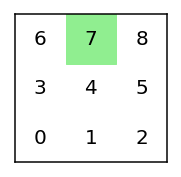

In [10]:
env = Environment(lucky=[(1,2)])
agent1 = Agent(env)
show_maze(env)

epoch : 1 
epoch : 2 
epoch : 3 


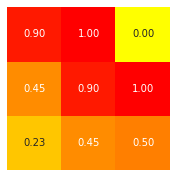

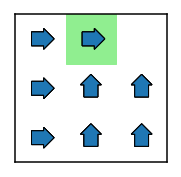

In [11]:
train(agent1)

## 4.2 シミュレーション2

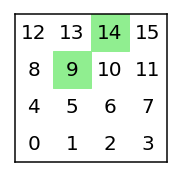

In [12]:
env2 = Environment(size=4, lucky=[(1,2),(2,3)])
agent2 = Agent(env2)
show_maze(env2)

epoch : 1 
epoch : 2 
epoch : 3 


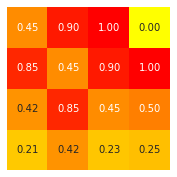

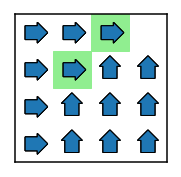

In [13]:
train(agent2)

## 4.3 シミュレーション3

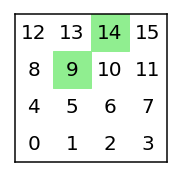

In [14]:
env3 = Environment(size=4, lucky=[(1,2),(2,3)])
agent3 = Agent(env3, policy=[1/4, 1/4, 1/4,1/4])
show_maze(env3)

epoch : 1 
epoch : 2 
epoch : 3 


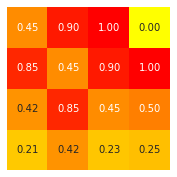

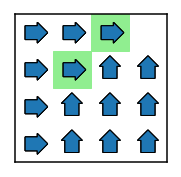

In [15]:
train(agent3)